<h1 align='center'>  <font size = '6' color='red'> Practical 5 (Questions): How to Handle Outliers <font> </h1>


    
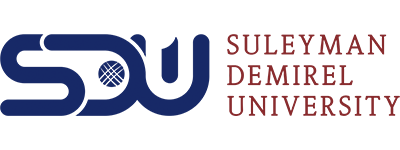

<br>

 
    
  <center align="left">    <center align="left"><center align="left"> <font color='dark blue'><font style= 'bold' size='3' color='dark'>  Instructors: Dr. Khaled Mohamad, Dr. Aziza Aipenova, and Dr. Dauren Ayazbayev <font> </center>
      


You will use New York city Airbnb dataset. The data is related to host and guest houses in New York city. You are required to handle outliers based on the price per night. Please, follow the instructions.

## Detecting Outlier

In [11]:
#Import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [12]:
#Read the file AB_NYC_2019.csv
df = pd.read_csv("C:/Users/aruke/Downloads/AB_NYC_2019.csv")

#Show the the tabulated data
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


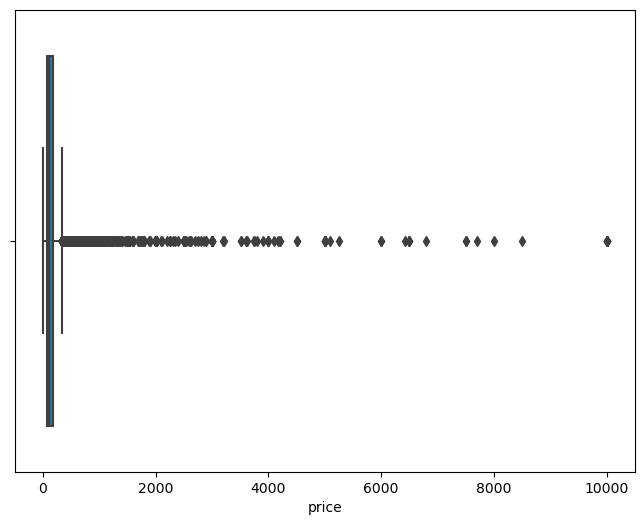

In [13]:
#Draw the box plot of the price coloumn
plt.figure(figsize=(8, 6))
sns.boxplot(x = df['price']) 
plt.show() 

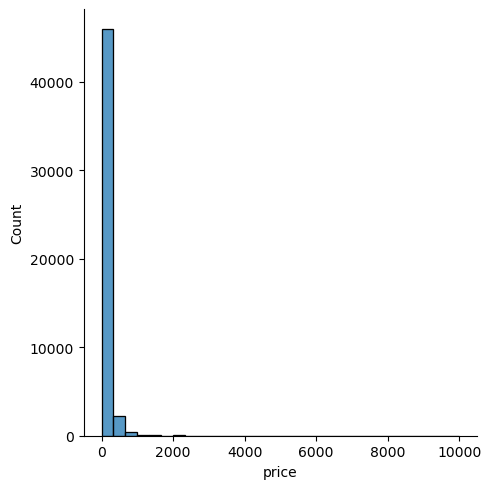

In [14]:
#Draw the a Histrogram of the price coloumn with bins = 30. Use seaborn lib.
sns.displot(df['price'], bins = 30) 
plt.show()

## Z-score

In [15]:
#Show the five number summary of your dataset
minimum = np.min(df['price'])
q1 = np.percentile(df['price'], 25)
median = np.median(df['price'])
q3 = np.percentile(df['price'], 75)
maximum = np.max(df['price'])
print(f"Min: {minimum}")
print(f"Q1: {q1}")
print(f"Median: {median}")
print(f"Q3: {q3}")
print(f"Max: {maximum}")

Min: 0
Q1: 69.0
Median: 106.0
Q3: 175.0
Max: 10000


In [16]:
#What is the shape of your dataset?
df.shape

(48895, 16)

In [17]:
#import the required library to calculate the zscore and the library that is going to help you to get the absolute value
from scipy.stats import zscore

In [39]:
# get the absolute value of the zscore that is based on price  
san = abs(zscore(df['price']))
print(san)

0        0.015493
1        0.300974
2        0.011329
3        0.265335
4        0.302811
           ...   
48890    0.344452
48891    0.469373
48892    0.157070
48893    0.406912
48894    0.261171
Name: price, Length: 48895, dtype: float64


In [19]:
#Get the outlier dataset when zscore is greater 3  
from scipy.stats import zscore
z = np.abs(zscore(df['price']))
outlier = df [z>3]
print(outlier)

             id                                               name    host_id  \
496      174966              Luxury 2Bed/2.5Bath Central Park View     836168   
762      273190          6 Bedroom Landmark West Village Townhouse     605463   
946      363673                   Beautiful 3 bedroom in Manhattan     256239   
1105     468613   $ (Phone number hidden by Airbnb) weeks - room f    2325861   
1414     634353                Luxury 1Bed with Central Park Views     836168   
...         ...                                                ...        ...   
48301  36186719           Private Bedroom in the Heart of Chelsea!  268920555   
48304  36189195      Next to Times Square/Javits/MSG! Amazing 1BR!  270214015   
48305  36189257             2BR Near Museum Mile! Upper East Side!  272166348   
48523  36308562  Tasteful & Trendy Brooklyn Brownstone, near Train  217732163   
48535  36311055     Stunning & Stylish Brooklyn Luxury, near Train  245712163   

           host_name neighb

In [20]:
#Show the shapee of the outlier dataset
outlier.shape

(388, 16)

<Axes: xlabel='price'>

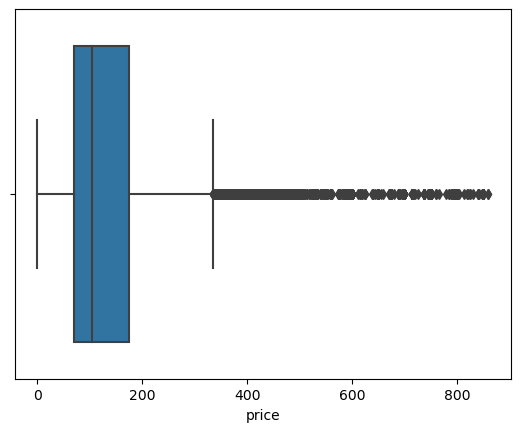

In [21]:
#Drop outliers dataset from your original dataset and assign a new name for the clean dataset
df2 = df.drop(outlier.index)
df2.shape
sns.boxplot(x = df2['price'])

In [22]:
#Show the shapee of the new dataset 
df2.shape

(48507, 16)

<Axes: xlabel='price'>

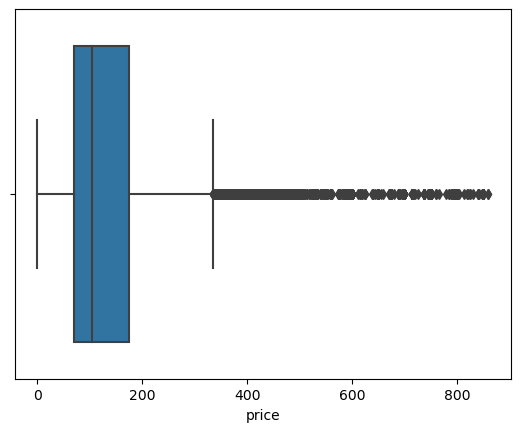

In [26]:
#Draw boxplot of the price in your new dataset using seaborn library
sns.boxplot(x = df2['price'])

## IQR Rule

In [24]:
#calculate Q1 
Q1 = df['price'].quantile(0.25)
Q1

69.0

In [25]:
#calculate Q3
Q3 = df['price'].quantile(0.75)
Q3

175.0

In [27]:
#calculate IQR (use 1.5)
IQR = Q3 -Q1
n = 1.5

lower_outlier = Q1-(n*IQR)

high_outlier = Q1+(n*IQR)

print(IQR, lower_outlier, high_outlier)

106.0 -90.0 228.0


In [28]:
# Get the values of your dataset that get prices lower than the value of the lower outlier
below_lower = df[(df['price']<lower_outlier)]
below_lower

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [29]:
# Get the values of your dataset that get prices higher than the value of the high outlier
above_high = df[(df['price']> high_outlier)]
above_high

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,2018-11-03,0.12,1,180
62,15711,2 bedroom - Upper East Side-great for kids,61491,D,Manhattan,Upper East Side,40.77065,-73.95269,Entire home/apt,250,2,66,2019-03-30,0.57,2,231
68,16595,*HAVEN LOFT - Entire Floor - Six Windows - Bri...,64522,Daniel,Brooklyn,Williamsburg,40.70933,-73.96792,Entire home/apt,275,1,148,2019-06-23,1.40,1,362
71,17037,Lovely EV Artist's Home,66035,Anna,Manhattan,East Village,40.72162,-73.98008,Entire home/apt,230,9,49,2018-05-14,0.43,1,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48833,36450896,Brand New 3-Bed Apt in the Best Location of FiDi,29741813,Yue,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475,2,0,NaN,NaN,1,64
48839,36452721,Massage Spa. Stay overnight. Authors Artist dr...,274079964,Richard,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,NaN,NaN,1,23
48842,36453160,LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...,224171371,LuxuryApartmentsByAmber,Manhattan,Chelsea,40.75204,-74.00292,Entire home/apt,350,1,0,NaN,NaN,1,9
48856,36457700,"Large 3 bed, 2 bath , garden , bbq , all you need",66993395,Thomas,Brooklyn,Bedford-Stuyvesant,40.68886,-73.92879,Entire home/apt,345,4,0,NaN,NaN,3,354


In [30]:
#Get the outliers dataset. Outliers are located outside the range of IQR
outlier_df = df[(df['price']< lower_outlier) | (df['price']> high_outlier)]

In [31]:
# What is the shape of outliers dataset?
outlier_df.shape

(7043, 16)

In [32]:
# Exclude outliers by extracting the values inside the IQR range from the original dataset
df3 = df[((df['price']> lower_outlier)& (df['price']< high_outlier))]
print(len(outlier_df))

7043


In [33]:
#What is the shape of the dataset now? Compare it with the previous ones.
print(df.shape)
print(df3.shape)

(48895, 16)
(41829, 16)


<Axes: xlabel='price'>

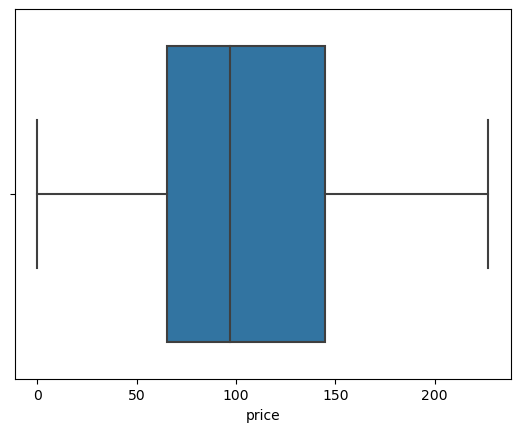

In [51]:
#Let us see how the boxplot look like with this dataset
sns.boxplot(x = df3['price'])

In [34]:
# Exclude outliers by using the complement of the outlier dataset in our data. Don't Forget to assign anew new for dataset 
df4 = df[~((df['price']< lower_outlier) | (df['price']> high_outlier))]
print(df4)

             id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_grou

In [35]:
#What is the shape of the now dataset? Compare it with the previous and orignial ones.
print(df4.shape)
print(df3.shape)
print(df.shape)

(41852, 16)
(41829, 16)
(48895, 16)


In [36]:
# Exclude outliers by droping the outlier dataset from the original data. Don't Forget to assign anew new for dataset 
df5 = df.drop(outlier_df.index)


In [37]:
#What is the shape of the new dataset? Compare it with the previous ones.
print(df5.shape)
print(df4.shape)
print(df3.shape)
print(df.shape)


(41852, 16)
(41852, 16)
(41829, 16)
(48895, 16)
